## Machine Learning Aplicado - Taller Práctico: Similitud del Coseno


### 1. Cargar el conjunto de datos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
df = pd.read_csv('Peliculas.csv')

#### 1.1 Descripcion del conjunto de datos

In [6]:
def summarize_data(df):
    """
    Obtener un resumen estadístico y general del DataFrame.

    :param df: DataFrame de pandas.
    """
    print("Primeras 5 filas del DataFrame:")
    print(df.head())
    
    print("\nInformación del DataFrame:")
    print(df.info())
    
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    
    print("\nRecuento de valores nulos por columna:")
    print(df.isnull().sum())

summarize_data(df)

Primeras 5 filas del DataFrame:
              peliculas  Amor  Aventura  Accion  Comedia  Terror  Crimen  \
0      Mision Imposible     0         1       1        0       0       0   
1    Piratas del Caribe     0         1       1        1       0       0   
2  Resacon en las Vegas     0         0       0        1       0       0   
3            James Bond     0         1       0        0       0       0   
4             Toy Story     0         1       0        0       0       0   

   Drama  Fantasia  Misterio  Thriller  Guerra  Biografia  Animacion  
0      0         0         0         0       0          0          0  
1      0         0         0         0       0          0          0  
2      0         0         0         0       0          0          0  
3      0         0         0         0       0          0          0  
4      0         0         0         0       0          0          1  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entri

In [15]:
# Graficar los géneros por película
def plot_genres_by_movie(df):
    df_genres = df.set_index('peliculas').T
    df_genres = df_genres.loc[(df_genres != 0).any(axis=1)]
    
    fig, ax = plt.subplots(figsize=(10, 7))
    df_genres.plot(kind='bar', stacked=True, ax=ax, colormap='tab20c')
    plt.title('Géneros por Película')
    plt.xlabel('Géneros')
    plt.ylabel('Número de Películas')
    plt.legend(title='Películas', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [21]:
# Graficar el número de películas por género
def plot_movies_by_genre(df):
    genre_counts = df.drop(columns=["peliculas"]).sum()
    
    # Filtrar géneros con al menos una película
    genre_counts = genre_counts[genre_counts > 0]
    
    # Colores personalizados
    colors = plt.cm.Paired(range(len(genre_counts)))
    
    plt.figure(figsize=(10, 7))
    wedges, texts, autotexts = plt.pie(genre_counts, autopct='%1.1f%%', startangle=140, colors=colors)
    
    # Mejorar la visualización de texto
    for text in autotexts:
        text.set_color('white')
        text.set_fontsize(12)
    
    plt.title('Distribución de Películas por Género', fontsize=16)
    
    # Añadir leyenda con la cantidad de películas
    legend_labels = [f'{genre}: {count} películas' for genre, count in zip(genre_counts.index, genre_counts)]
    plt.legend(wedges, legend_labels, title="Géneros", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

In [31]:
def plot_correlation_matrix(df, title='Matriz de Correlación de Géneros', figsize=(12, 8), cmap='coolwarm'):
    """
    Genera y muestra un mapa de calor de la matriz de correlación de un DataFrame.

    Parameters:
    df (DataFrame): El DataFrame que contiene los datos.
    title (str): El título del gráfico. Default es 'Matriz de Correlación de Géneros'.
    figsize (tuple): El tamaño de la figura. Default es (12, 8).
    cmap (str): El mapa de colores a utilizar. Default es 'coolwarm'.
    """
    # Calcular la matriz de correlación
    correlation_matrix = df.corr()

    # Crear el mapa de calor
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap)
    plt.title(title)
    plt.show()

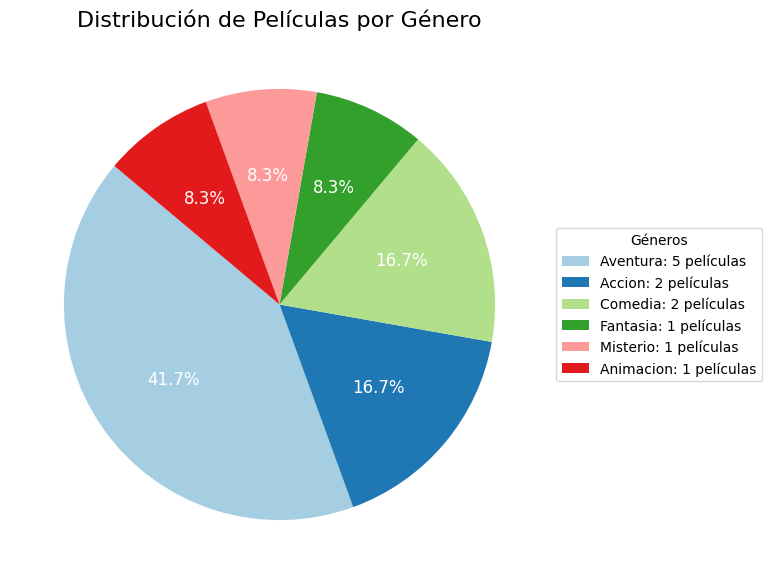

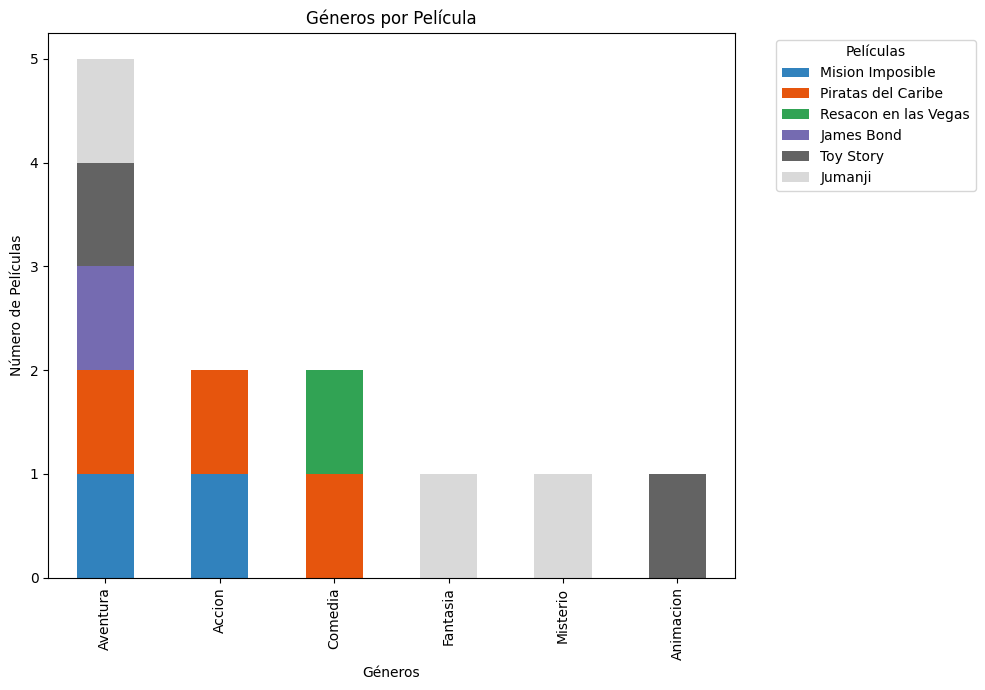

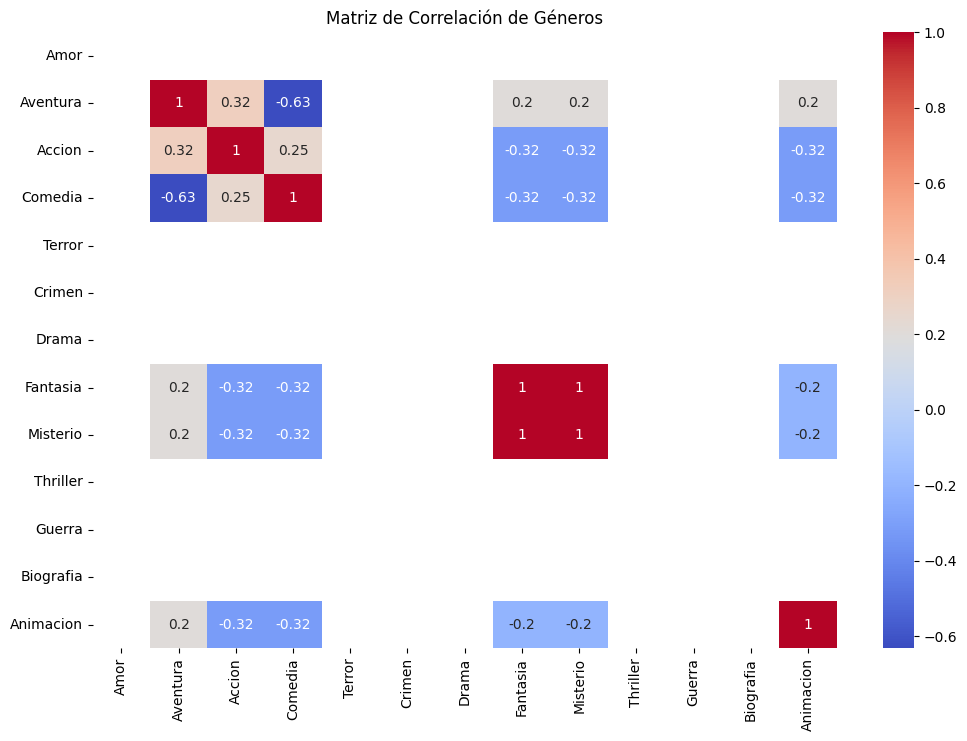

In [33]:
# Ejecutar las funciones de graficación
plot_movies_by_genre(df)
plot_genres_by_movie(df)
plot_correlation_matrix(df.iloc[:, 1:], title='Matriz de Correlación de Géneros')

### 2. Funcion de similitud del coseno

In [23]:
def coseno_similitud(vec1, vec2):
    """
    Calcula la similitud del coseno entre dos vectores.
    
    Parameters:
    vec1 (array-like): Primer vector.
    vec2 (array-like): Segundo vector.
    
    Returns:
    float: Similitud del coseno entre vec1 y vec2.
    """
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

In [24]:
pelicula_referencia = df.iloc[0, 1:]  

In [44]:
def calcular_y_graficar_similitud(df, pelicula_nombre=None, pelicula_index=None):
    """
    Calcula la similitud del coseno de una película de referencia con todas las demás y grafica los resultados.
    
    Parameters:
    df (DataFrame): DataFrame que contiene los datos de las películas.
    pelicula_nombre (str): Nombre de la película de referencia en el DataFrame.
    pelicula_index (int): Índice de la película de referencia en el DataFrame (opcional si se proporciona pelicula_nombre).
    
    Returns:
    None
    """
    # Validar los parámetros de entrada
    if pelicula_nombre:
        if pelicula_nombre in df['peliculas'].values:
            pelicula_index = df[df['peliculas'] == pelicula_nombre].index[0]
        else:
            raise ValueError("El nombre de la película no existe en el DataFrame.")
    elif pelicula_index is None:
        raise ValueError("Debe proporcionar el nombre o el índice de la película de referencia.")
    
    # Seleccionar la película de referencia
    pelicula_referencia = df.iloc[pelicula_index, 1:].values  # Sin la columna 'peliculas'
    
    # Calcular la similitud del coseno para todas las películas
    similitudes = []
    
    for i in range(len(df)):
        pelicula_actual = df.iloc[i, 1:].values  # Obtener el vector de géneros de la película actual
        similitud = coseno_similitud(pelicula_referencia, pelicula_actual)
        similitudes.append(similitud)
    
    # Excluir la similitud de la película consigo misma del cálculo de máximo y mínimo
    similitudes_excluyendo_misma = [similitudes[i] for i in range(len(similitudes)) if i != pelicula_index]
    
    # Graficar las similitudes
    plt.figure(figsize=(12, 8))
    sns.lineplot(x=df['peliculas'], y=similitudes, marker='o')
    plt.axvline(x=pelicula_index, color='r', linestyle='--')
    plt.title(f'Similitud del Coseno con "{df.iloc[pelicula_index, 0]}"')
    plt.xlabel('Películas')
    plt.ylabel('Similitud del Coseno')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Calcular resultados numéricos adicionales excluyendo la película consigo misma
    similitud_media = np.mean(similitudes_excluyendo_misma)
    similitud_maxima = np.max(similitudes_excluyendo_misma)
    similitud_minima = np.min(similitudes_excluyendo_misma)
    pelicula_maxima = df['peliculas'][similitudes.index(similitud_maxima)]
    pelicula_minima = df['peliculas'][similitudes.index(similitud_minima)]
    
    # Mostrar resultados numéricos
    print(f"Similitud media: {similitud_media:.2f}")
    print(f"Similitud máxima: {similitud_maxima:.2f} (Película: {pelicula_maxima})")
    print(f"Similitud mínima: {similitud_minima:.2f} (Película: {pelicula_minima})")
    
    # Conclusión automatizada
    conclusion = f"La película de referencia '{df.iloc[pelicula_index, 0]}' tiene una similitud media de {similitud_media:.2f} con las demás películas. "
    conclusion += f"La película más similar es '{pelicula_maxima}' con una similitud de {similitud_maxima:.2f}. "
    conclusion += f"La película menos similar es '{pelicula_minima}' con una similitud de {similitud_minima:.2f}."
    print(conclusion)

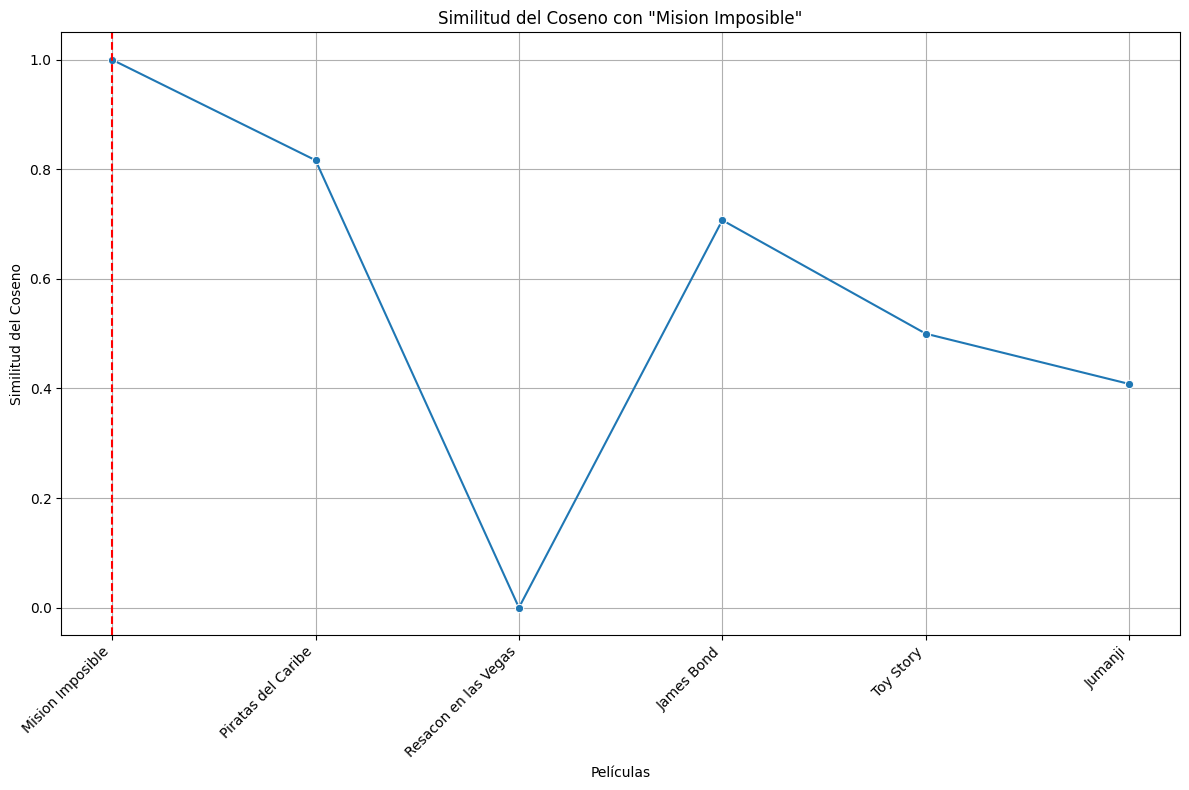

Similitud media: 0.49
Similitud máxima: 0.82 (Película: Piratas del Caribe)
Similitud mínima: 0.00 (Película: Resacon en las Vegas)
La película de referencia 'Mision Imposible' tiene una similitud media de 0.49 con las demás películas. La película más similar es 'Piratas del Caribe' con una similitud de 0.82. La película menos similar es 'Resacon en las Vegas' con una similitud de 0.00.


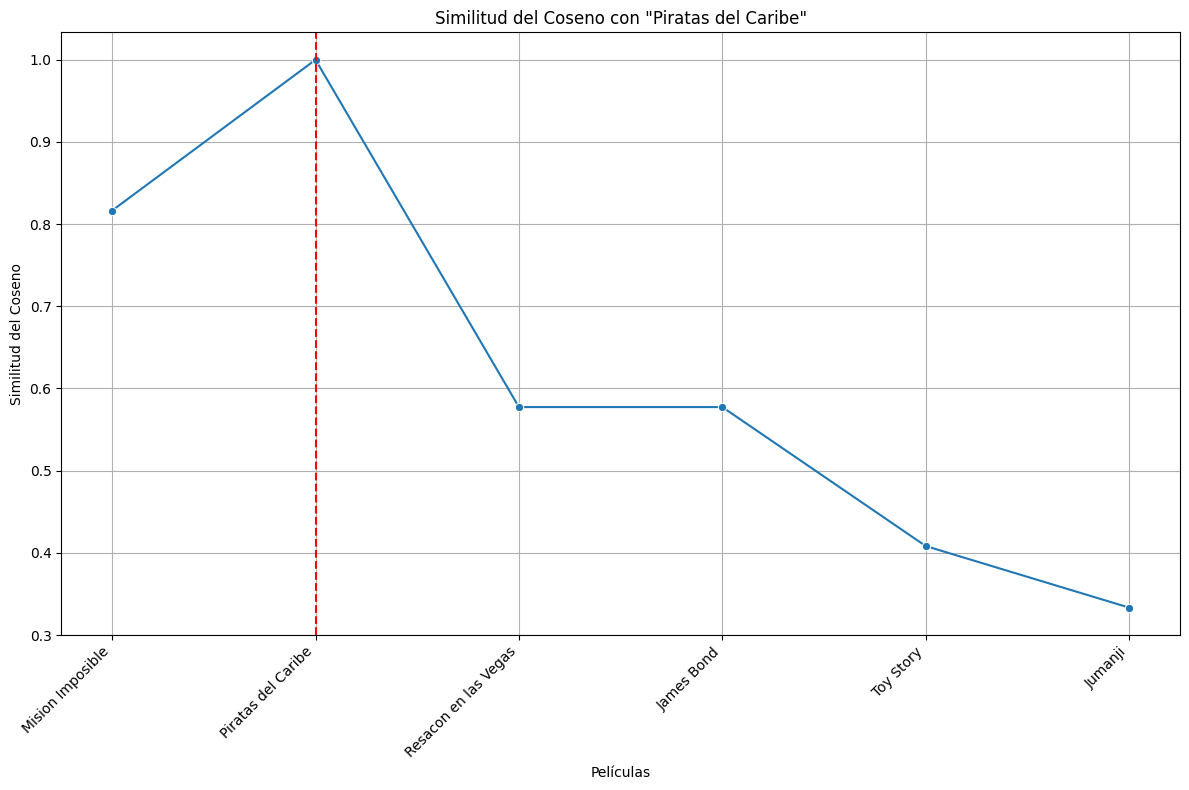

Similitud media: 0.54
Similitud máxima: 0.82 (Película: Mision Imposible)
Similitud mínima: 0.33 (Película: Jumanji)
La película de referencia 'Piratas del Caribe' tiene una similitud media de 0.54 con las demás películas. La película más similar es 'Mision Imposible' con una similitud de 0.82. La película menos similar es 'Jumanji' con una similitud de 0.33.


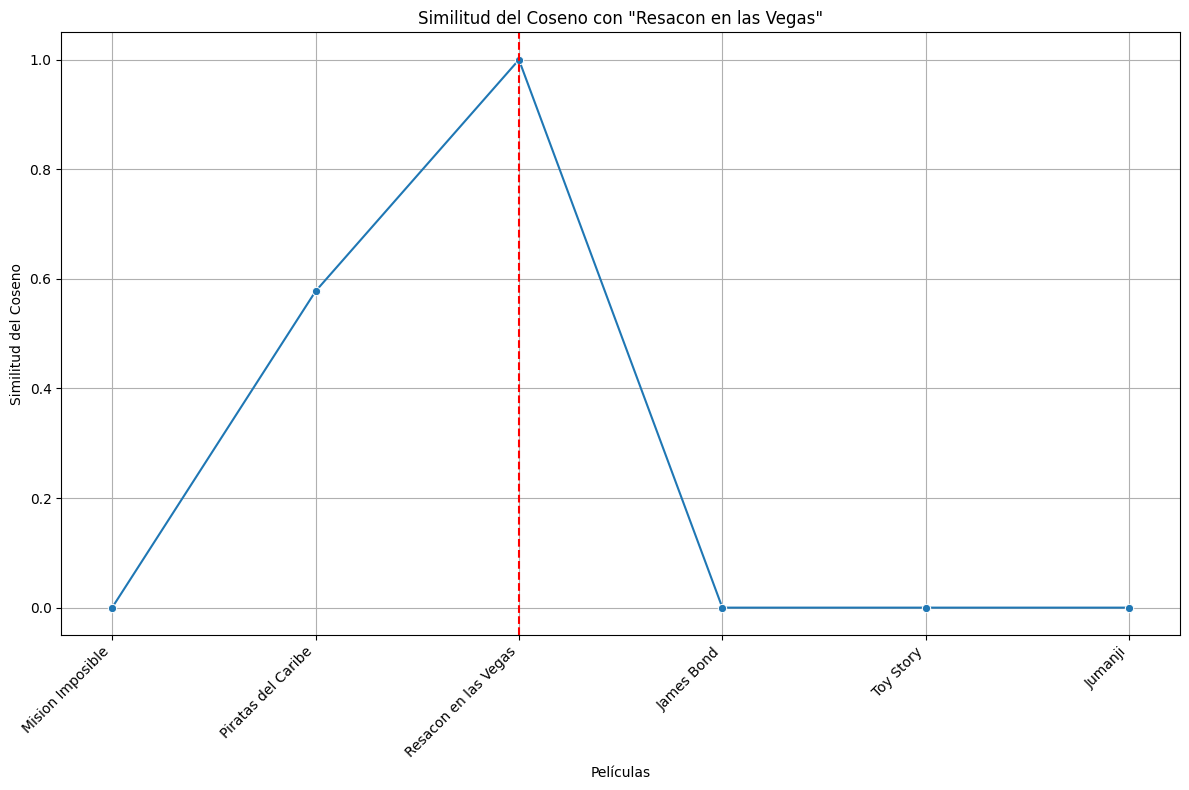

Similitud media: 0.12
Similitud máxima: 0.58 (Película: Piratas del Caribe)
Similitud mínima: 0.00 (Película: Mision Imposible)
La película de referencia 'Resacon en las Vegas' tiene una similitud media de 0.12 con las demás películas. La película más similar es 'Piratas del Caribe' con una similitud de 0.58. La película menos similar es 'Mision Imposible' con una similitud de 0.00.


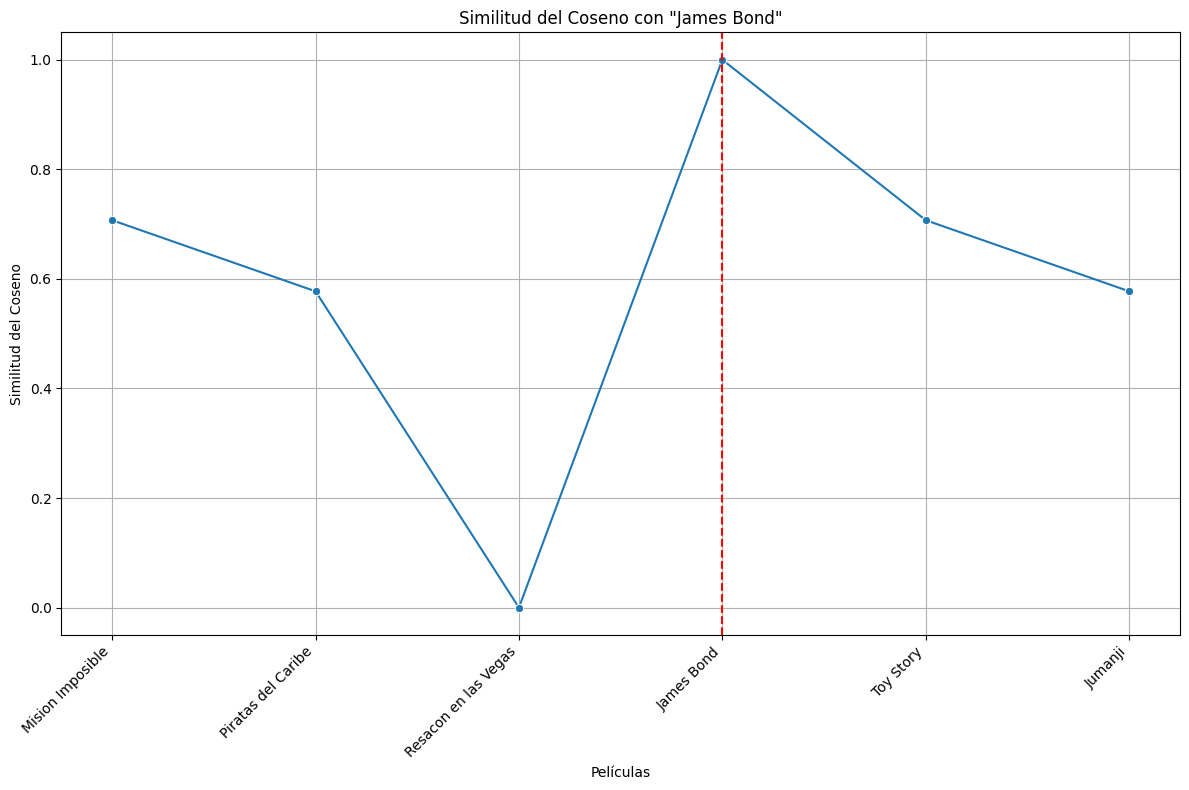

Similitud media: 0.51
Similitud máxima: 0.71 (Película: Mision Imposible)
Similitud mínima: 0.00 (Película: Resacon en las Vegas)
La película de referencia 'James Bond' tiene una similitud media de 0.51 con las demás películas. La película más similar es 'Mision Imposible' con una similitud de 0.71. La película menos similar es 'Resacon en las Vegas' con una similitud de 0.00.


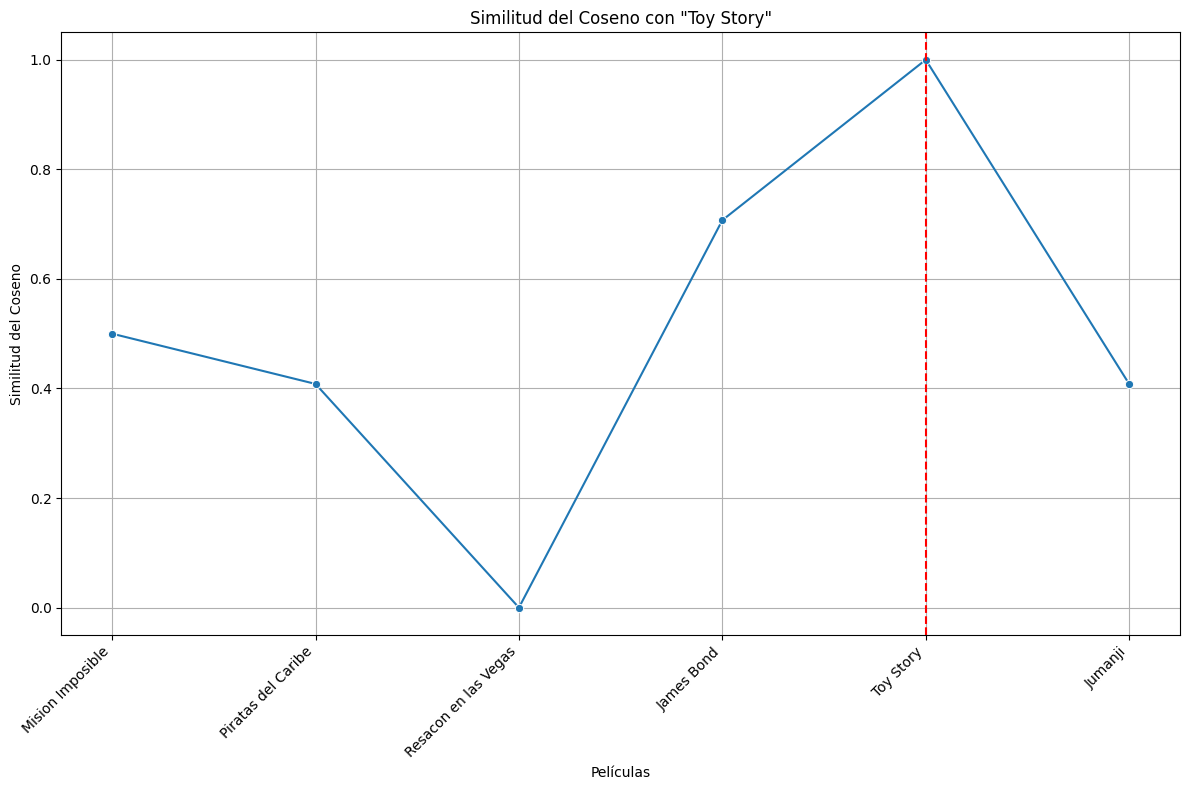

Similitud media: 0.40
Similitud máxima: 0.71 (Película: James Bond)
Similitud mínima: 0.00 (Película: Resacon en las Vegas)
La película de referencia 'Toy Story' tiene una similitud media de 0.40 con las demás películas. La película más similar es 'James Bond' con una similitud de 0.71. La película menos similar es 'Resacon en las Vegas' con una similitud de 0.00.


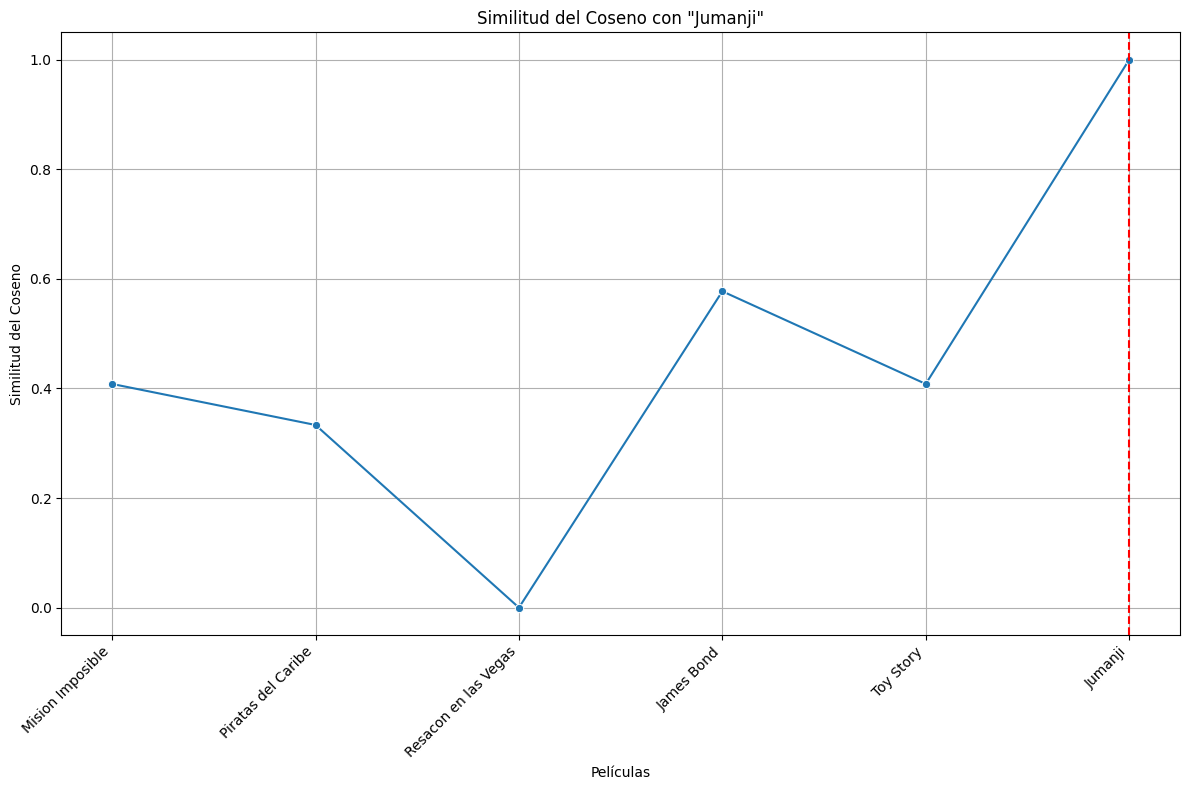

Similitud media: 0.35
Similitud máxima: 0.58 (Película: James Bond)
Similitud mínima: 0.00 (Película: Resacon en las Vegas)
La película de referencia 'Jumanji' tiene una similitud media de 0.35 con las demás películas. La película más similar es 'James Bond' con una similitud de 0.58. La película menos similar es 'Resacon en las Vegas' con una similitud de 0.00.


In [45]:
# Simlitud del cosen con la película de referencia, (todas las películas se comparan con todas las demás)
for i in range(len(df)):
    calcular_y_graficar_similitud(df, pelicula_index=i)